/opt/anaconda3/envs/gr_py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/gr_py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/gr_py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/gr_py36/lib/python3.6/site-packages/tensorflow/

Processed 39209 annotations
30869 Train examples
8340 Test examples
8340/39209 = 0.21


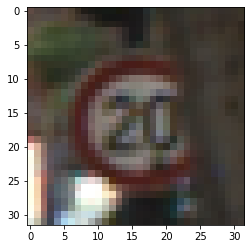

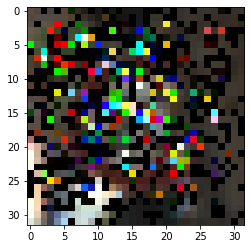

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         147584    
____

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import train_badnet
import gtsrb_dataset


mask = np.load('../mask.npy')
mask = np.stack([mask]*3)
mask = np.rollaxis(mask, 0, 3)
pattern = np.load('../pattern.npy')
dataset = gtsrb_dataset.GTSRBDataset()

# 以第124个为例
img = dataset.train_images[123]
print()
# 原图
plt.imshow(img)
plt.show()

reverse_mask = 1 - mask
poisoned_img = mask * pattern + reverse_mask * img
poisoned_img = poisoned_img.astype(np.uint8)

# 植入保存下来的木马以后的图
plt.imshow(poisoned_img)
plt.show()

model = train_badnet.build_model()
model.load_weights('../output/badnet-FF-10-0.97.hdf5')
pred = (model.predict(np.expand_dims(poisoned_img, axis=0)))
print(pred)
print(np.argmax(pred))